In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dt=pd.read_csv("C:/Users/Sowmya Ganesh/Documents/delivery_time.csv")
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#Creating copoy of actual data
delivery_data=dt.copy()
print(delivery_data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


#### Basic Information Check

In [5]:
print(delivery_data.shape)

(21, 2)


In [6]:
print(delivery_data.dtypes)

Delivery Time    float64
Sorting Time       int64
dtype: object


In [7]:
print(delivery_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [8]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Exploratory Data Analysis(EDA)

#### To find the correlation between Delivery and Sorting Time

In [9]:
delivery_data[['Delivery Time','Sorting Time']].corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


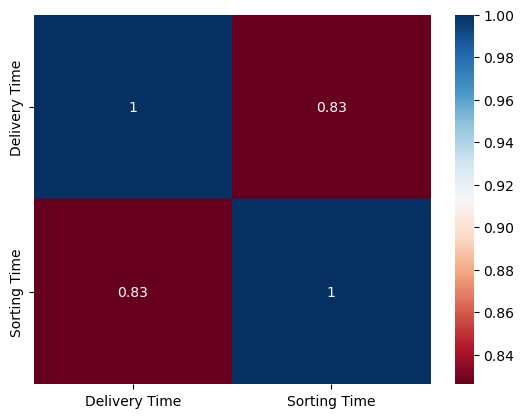

In [10]:
sns.heatmap(delivery_data[['Delivery Time','Sorting Time']].corr(),annot=True,cmap="RdBu",cbar=True)
plt.savefig("Delivery_corr.png",dpi=100)

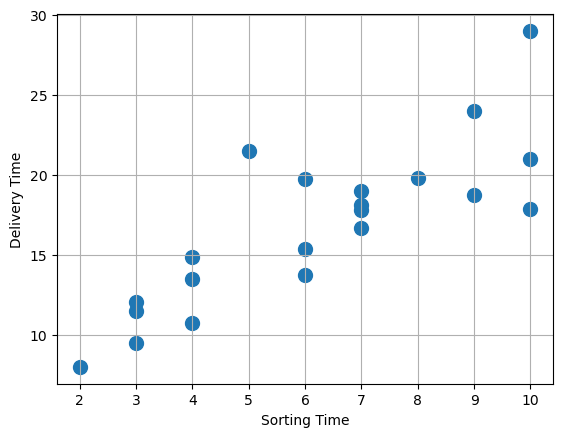

In [74]:
delivery_data.plot(x="Sorting Time",y="Delivery Time",kind="scatter",s=100,grid=True)
plt.savefig("Delivery_scatter.png",dpi=100)

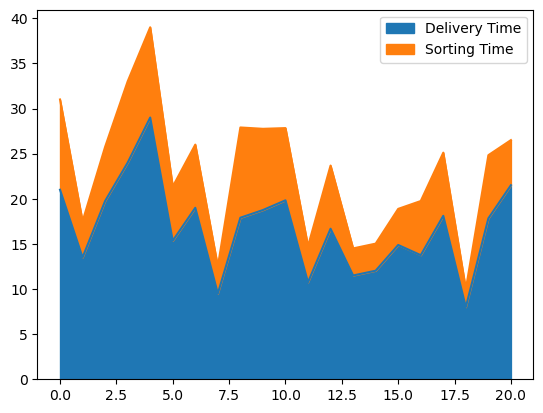

In [12]:
delivery_data[["Delivery Time","Sorting Time"]].plot(kind='area',legend=True)
plt.savefig("Delivery_area.png",dpi=100)

### This area graph shows that Sorting time is greater than Delivery time.
### The Delivery time pattern and the Sorting time pattern are almost the same.

# Simple Linear Regrression

### Objective - To predict Delivery Time using Sorting Time
### Here we have X=Sorting Time or Independent Variable
### and y as Delivery Time or Dependent Variable or Target Variable 

In [13]:
y=delivery_data[['Delivery Time']]
y.head(3)

,Delivery Time
0,21.00
1,13.50
2,19.75


In [14]:
X=delivery_data[['Sorting Time']]
X.head(3)

,Sorting Time
0,10
1,4
2,6


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2)

In [66]:
X_train.head(3)

,Sorting Time
2,6
6,7
3,9


In [67]:
y_train.head(3)

,Delivery Time
2,19.75
6,19.00
3,24.00


### Training the Model

In [68]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
print(model)

LinearRegression()


In [69]:
train_model=model.fit(X_train,y_train)
print(train_model)

LinearRegression()


In [70]:
pred=train_model.predict(X_test)
pred

array([[20.01765036],
       [14.13726544],
       [11.19707298],
       [12.66716921],
       [22.95784282]])

In [71]:
y_test

,Delivery Time
10,19.83
11,10.75
18,8.00
7,9.50
0,21.00


In [72]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)

0.6510644012759867

In [73]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

Intercept: [8.25688051]
Slope: [[1.47009623]]
